# Exercise 5: Time Complexity and Plotting Time Complexity

- Student name: Merilin Sousa Silva
- Matriculation number: 23-726-086

## Introduction
This exercise serves as an introduction to time complexity, specifically how to measure the time complexity of a function and how to improve it.

The last part of this exercise also shows you how to plot the time complexity of a function.

### Submission
This is an non-graded exercise, but you can submit your solution to get feedback from us. Make sure to submit your code through GitLab before **April 9th at 23:59**. Late submissions will not be considered for feedback. Please make sure to stick to Python best practices and documenting your code appropriately with comments and docstrings.

## Task 1: Determine the time complexity of simple algorithms
In the cell below you will find three simple algorithms. Your task is to determine the time complexity of each algorithm. Please write your answer in the docstrings.

In [4]:
def triplicates_inefficient(strings: list[str]) -> set[str]:
    """
    Find the set of strings that appear exactly three times in `strings`.

    Time complexity: O(n^2)
    """
    triplicates = set() # 1
    for string in strings:
        if strings.count(string) == 3: # called n^2 times
            triplicates.add(string) # called n times
    return triplicates

def longest_repeated_substring_inefficient(string: str) -> str:
    """
    Find the longest substring that is repeated at least once in `string`.

    Time complexity: 2n^4 + n^2 + 1, so O(n^4)
    """
    longest_substring = "" # called 1 time
    # Iterate through all possible substrings
    for substring1_start in range(len(string)):
        for substring1_end in range(substring1_start + 1, len(string)):
            substring1 = string[substring1_start:substring1_end] # called n^2 times

            # Iterate through all possible substrings that start after the first substring
            for substring2_start in range(substring1_end, len(string)):
                for substring2_end in range(substring2_start + 1, len(string)):
                    substring2 = string[substring2_start:substring2_end] # called n^4 times

                    # Check if we have a new longest repeated substring
                    if substring1 == substring2 and len(substring1) > len(longest_substring):
                        longest_substring = substring1 # called n^4 times

def fibonacci_inefficient(n: int) -> int:
    """
    Calculate the `n`th number in the Fibonacci sequence.

    Time complexity: O(2^n)
    """
    # See https://en.wikipedia.org/wiki/Fibonacci_sequence
    # for more information on the Fibonacci sequence
    if n <= 1:
        return n
    return fibonacci_inefficient(n - 1) + fibonacci_inefficient(n - 2)

'''

    Recursive Calls: The function calls itself twice for each input n, once for n-1 and again for n-2.
    Branching Calls: This creates a branching call tree, where each level has two branches.
    Redundant Calculations: The problem lies in the repeated calculations. Subproblems like fib(n-1) get called multiple times throughout the recursion for different n values.

'''


'\n\n    Recursive Calls: The function calls itself twice for each input n, once for n-1 and again for n-2.\n    Branching Calls: This creates a branching call tree, where each level has two branches.\n    Redundant Calculations: The problem lies in the repeated calculations. Subproblems like fib(n-1) get called multiple times throughout the recursion for different n values.\n\n'

## Task 2: Improving time complexity
Now that you have determined the time complexity of the algorithms, you might have noticed that they are not very efficient. Your task is to improve the time complexity of the algorithms by implementing them in a more efficient way. Please write your implementations at the corresponding `TODO` comments in the cell below.

In [5]:
from collections import defaultdict

def triplicates_efficient(strings: list[str]) -> set[str]:
    """
    Find the set of strings that appear exactly three times in `strings`.

    Time complexity: O(n)
    """
    # TODO
    # Iterate through strings and add them to a dictionary until all strings are iterated through
    count_dict = {} # complexity of 1
    for string in strings:
        count_dict[string] = count_dict.get(string, 0) + 1 # n times
    # Filter out the ones that are of length 3
    triple_len_str = {string for string, count in count_dict.items() if count == 3} # number of times of the dictionary length

    return triple_len_str

def longest_repeated_substring_efficient(string: str) -> str:
    """
    Find the longest substring that is repeated at least once in `string`.

    Time complexity: O(n)
    """
    longest_substring = "" # time complexity of 1
    last_seen = defaultdict(int) # time complexity of 1

    for i, char in enumerate(string):
        # Check if the substring starting at last_seen[char] + 1 (excluding the current char)
        # has already been seen. If yes, it means we found a repeat.
        if last_seen[char] > 0 and i - last_seen[char] > len(longest_substring):
            longest_substring = string[last_seen[char] - 1:i] # Time complexity of n

        # Update last_seen for the current character
        last_seen[char] = i + 1  # Time complexity of n

    return longest_substring
print(longest_repeated_substring_efficient('ABCDABCDABCD'))



def fibonacci_efficient(n: int) -> int:
    """
    Calculate the `n`th number in the Fibonacci sequence.

    Time complexity: O(n)
    """
    # First a list is created to afterwards fill out
    fibonacci_list = [0, 1] + [0] * (n - 1) # complexity of 1

    # We loop through the fibonacci list starting from the 2nd item
    for i in range(2, n + 1):
        fibonacci_list[i] = fibonacci_list[i - 1] + fibonacci_list[i - 2] # complexity of n
    # return the nth number in the list
    return fibonacci_list[n]

ABCD


### Further exercises

In [ ]:
def two_sum_inefficient(numbers: list[int], target_sum: int) -> tuple[int, int]:
    """
    Finds two numbers in a list that add up to a given target sum.

    Time complexity: O(n^2)
    """
    for i in range(len(numbers)):
        for j in range(i + 1, len(numbers)):
            if numbers[i] + numbers[j] == target_sum:
                return i, j
    return None

In [6]:
def two_sum_efficient(numbers: list[int], target_sum: int) -> tuple[int, int]:
    num_dict = {}

    for num in numbers:
        pair = num_dict.get(target_sum - num, 0)
        if pair > 0:
            return num, pair
        else:
            num_dict[num] = num
    
print(two_sum_efficient([1, 4, 3, 7], 4))
        

(3, 1)


In [ ]:
def is_anagram_inefficient(word1: str, word2: str) -> bool:
    """
    Checks if two words are anagrams of each other.

    Time complexity: O(n^2)
    """
    return sorted(word1) == sorted(word2)


In [ ]:
def is_anagram_efficient(word1: str, word2: str) -> bool:
    """
    Checks if two words are anagrams of each other.

    Time complexity: 
    """
    return word1[::1] == word2

In [ ]:
def merge_sorted_lists_inefficient(list1: list[int], list2: list[int]) -> list[int]:
    """
    Merges two sorted lists into a single sorted list.

    Time complexity: O(n * m), where n and m are the lengths of the lists
    """
    merged_list = []
    i, j = 0, 0
    while i < len(list1) and j < len(list2):
        if list1[i] < list2[j]:
            merged_list.append(list1[i])
            i += 1
        else:
            merged_list.append(list2[j])
            j += 1
    merged_list += list1[i:]
    merged_list += list2[j:]
    return merged_list



In [ ]:
def merge_sorted_lists_efficient(list1: list[int], list2: list[int]) -> list[int]:
    """
    Merges two sorted lists into a single sorted list.

    Time complexity: O(n + m)
    """
    new_list = list1 + list2

    return sorted(new_list)

### Task 2.1: Plotting time complexity

Use the following code to plot the time complexity of the inefficient implementations and your more efficient implementations. You need to install the packages specified in `requirements.txt`. You don't need to understand the code for plotting (yet).

> **NOTE**: Some implementations will take a considerable amount of time to run. If you pick input data that is too large, it will take too long to run. If you pick input data that is too small, you will get a less accurate plot. You may need to adapt the `input_size` variable to find a good balance.

In [1]:
! pip install matplotlib

In [12]:
from matplotlib import pyplot as plt
import random
from utils import plot_time_complexity_sequence, plot_time_complexity_int

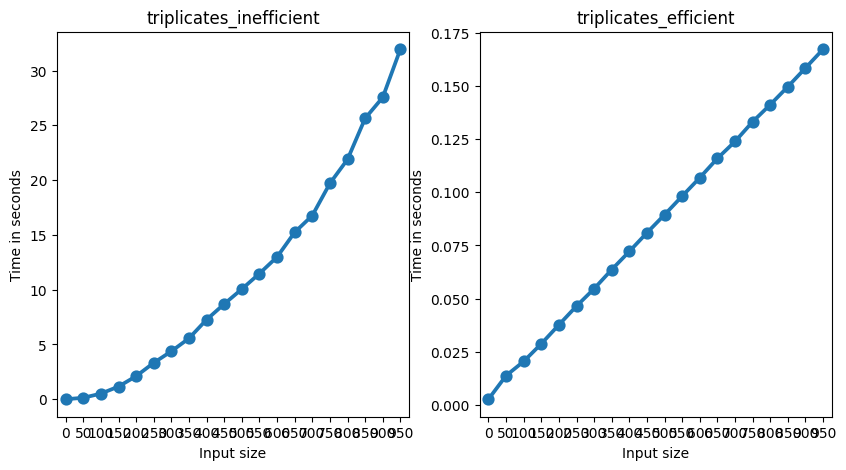

In [8]:
input_size = 1000
random_strings = [random.choice("abcde") for _ in range(input_size)]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
plot_time_complexity_sequence(triplicates_inefficient, random_strings, title="triplicates_inefficient", ax=ax1)
plot_time_complexity_sequence(triplicates_efficient, random_strings, title="triplicates_efficient", ax=ax2)

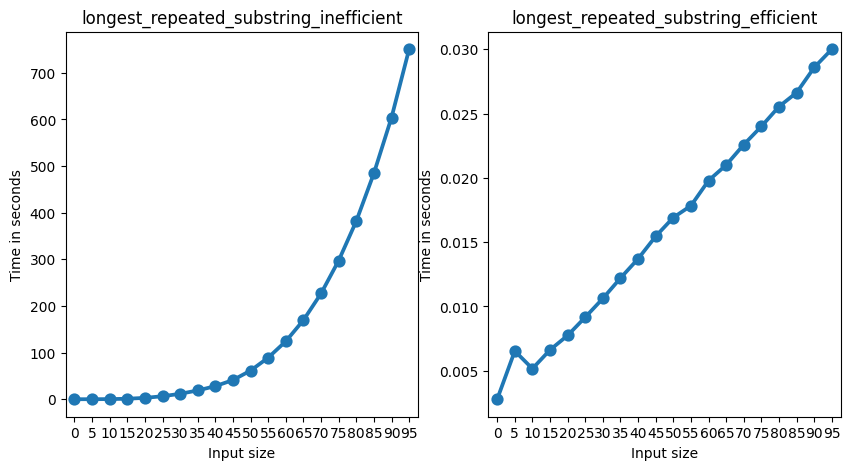

In [24]:
input_size = 100
random_string = random.choice("abcde") * input_size

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
plot_time_complexity_sequence(longest_repeated_substring_inefficient, random_string, title="longest_repeated_substring_inefficient", ax=ax1)
plot_time_complexity_sequence(longest_repeated_substring_efficient, random_string, title="longest_repeated_substring_efficient", ax=ax2)

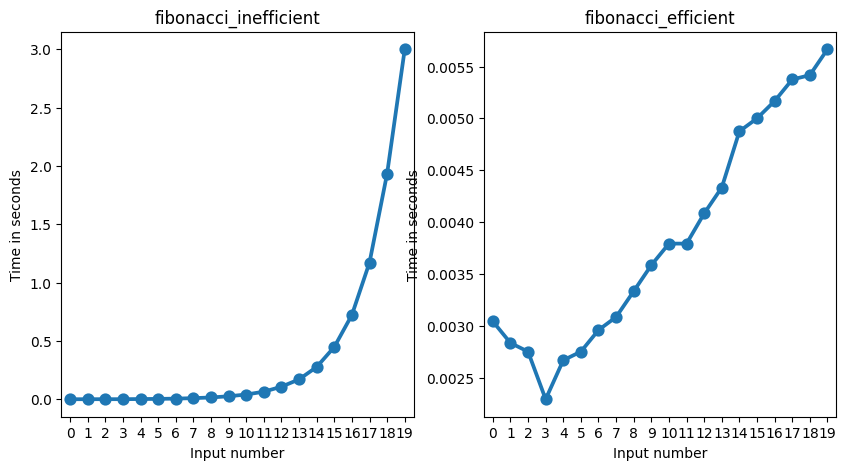

In [25]:
input_size = 20

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
plot_time_complexity_int(fibonacci_inefficient, input_size, title="fibonacci_inefficient", ax=ax1)
plot_time_complexity_int(fibonacci_efficient, input_size, title="fibonacci_efficient", ax=ax2)


### Task 2.2: Comment on the results
Look at the results of each function pair (inefficient vs efficient) and comment on the differences in time complexity. Did you achieve the expected improvement in time complexity? Was your calculation of the time complexity correct? Write your comments in the cell below.

**TODO**: Write your answers here.

**Triplicates:**
    The inefficient function does seem to plot to a n^2 time efficiency since the growth happens the slowest yet is exponential. The efficient function plotted as expected to a linear time complexity.

**Longest repeated substring:**
    Here, the inefficient function plots to a higher slope which could indicate a n^4 time complexity. The efficient one seems to plot to a linear time complexity yet there are some outliers at the start.

**Fibonacci:**
    Finally, the ineffcient function plots to a rapidly increasing slope, which indicates a 2^n time complexity and when plotting the efficient function, at the start it is rather irregular, yet seems to turn into a linear time complexity with increasing sample size.